Problem Statement - To predict whether a man can have heart disease after ten years with the following features



• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
## • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) italicized text







**Work Flow**

1.Data Collection

2.Pre-processing

3.EDA

4.Feature Engineering

5.Model Selection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("framingham.csv")

In [ ]:
df.shape

(4238, 16)

In [ ]:
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
a = df.columns
a

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df = df.rename(columns = {"male": "Male", 
                                  "age":"Age", 
                                  "education": "Education",
                            "currentSmoker" : "CurrentSmoker",
                             "cigsPerDay" : "Cigs_per_day" , "prevalentStroke" : "PrevalentStroke" , "prevalentHyp" : "PrevalentHyp","diabetes":"Diabetes","totChol":"Total_Chol","sysBP":"SysBP","diaBP":"DiaBP","heartRate":"Heartrate","glucose":"Glucose","TenYearCHD":"Target"} ) 

In [ ]:
b = df.columns

In [ ]:
ab = pd.DataFrame({'old_names' : a,'New_names': b})
ab

,old_names,New_names
0,male,Male
1,age,Age
2,education,Education
3,currentSmoker,CurrentSmoker
4,cigsPerDay,Cigs_per_day
5,BPMeds,BPMeds
6,prevalentStroke,PrevalentStroke
7,prevalentHyp,PrevalentHyp
8,diabetes,Diabetes
9,totChol,Total_Chol


In [ ]:
df.dtypes

Male                 int64
Age                  int64
Education          float64
CurrentSmoker        int64
Cigs_per_day       float64
BPMeds             float64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
Total_Chol         float64
SysBP              float64
DiaBP              float64
BMI                float64
Heartrate          float64
Glucose            float64
Target               int64
dtype: object

In [ ]:
df.isnull().sum()

Male                 0
Age                  0
Education          105
CurrentSmoker        0
Cigs_per_day        29
BPMeds              53
PrevalentStroke      0
PrevalentHyp         0
Diabetes             0
Total_Chol          50
SysBP                0
DiaBP                0
BMI                 19
Heartrate            1
Glucose            388
Target               0
dtype: int64

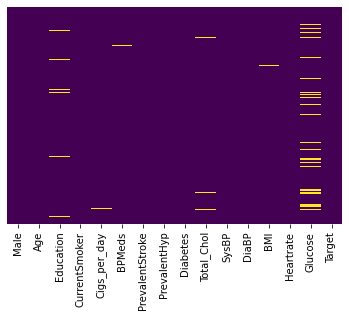

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df_new = pd.DataFrame(imputer.fit_transform(df))
df_new.columns = df.columns
df_new.index = df.index

In [ ]:
df_new.isnull().sum()

Male               0
Age                0
Education          0
CurrentSmoker      0
Cigs_per_day       0
BPMeds             0
PrevalentStroke    0
PrevalentHyp       0
Diabetes           0
Total_Chol         0
SysBP              0
DiaBP              0
BMI                0
Heartrate          0
Glucose            0
Target             0
dtype: int64

EDA

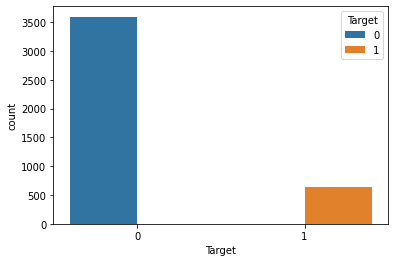

In [ ]:
sns.countplot('Target', hue='Target',data=df)
#Data provided tells that , there are more people who arent effected by heart disease
#Data is skewed(bell curve)

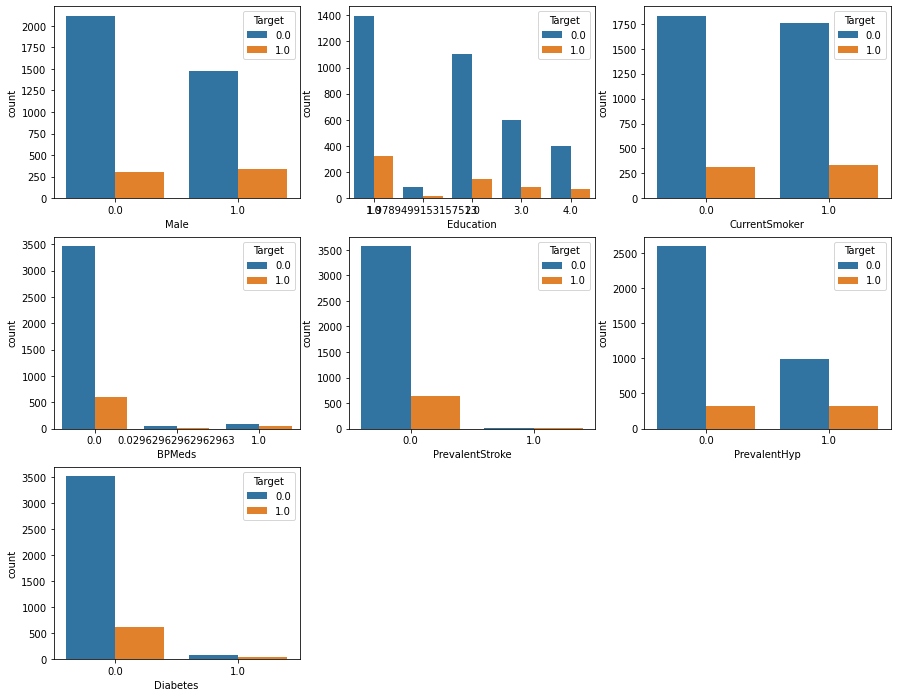

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(3,3,1)
sns.countplot('Male',hue='Target',data=df_new)
plt.subplot(3,3,2)
sns.countplot('Education',hue='Target',data=df_new)
plt.subplot(3,3,3)
sns.countplot('CurrentSmoker',hue='Target',data=df_new)
plt.subplot(3,3,4)
sns.countplot('BPMeds',hue='Target',data=df_new)
plt.subplot(3,3,5)
sns.countplot('PrevalentStroke',hue='Target',data=df_new)
plt.subplot(3,3,6)
sns.countplot('PrevalentHyp',hue='Target',data=df_new)
plt.subplot(3,3,7)
sns.countplot('Diabetes',hue='Target',data=df_new)

plt.show()

There seems to be a slighlty higher risk if its a male.

The more educated people are the lower their risk. Makes sense as they have more knowledge on how to take care of themselves.

Risk is the same for both smoker and non-smoker

People taking BPMeds have a higher risk.

People who had a stroke are at greater risk.

People who are hypertensive are at greater risk.

People with diabetes are at a higher risk

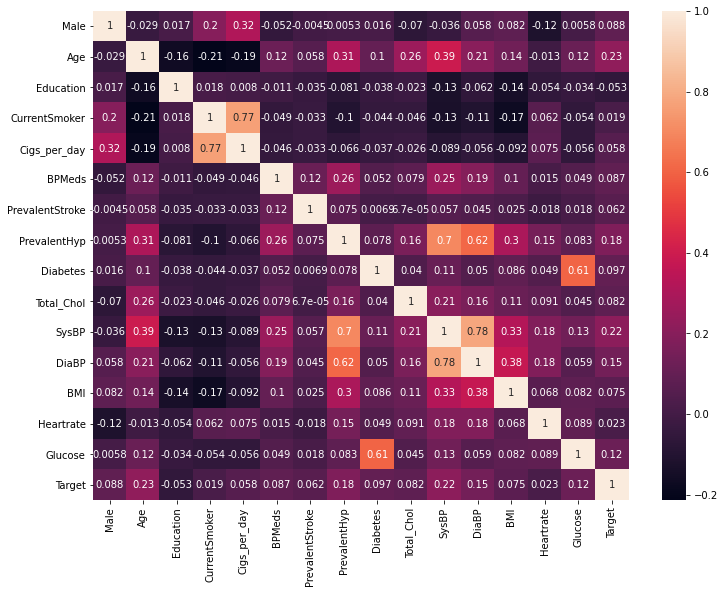

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_new.corr(), annot = True)

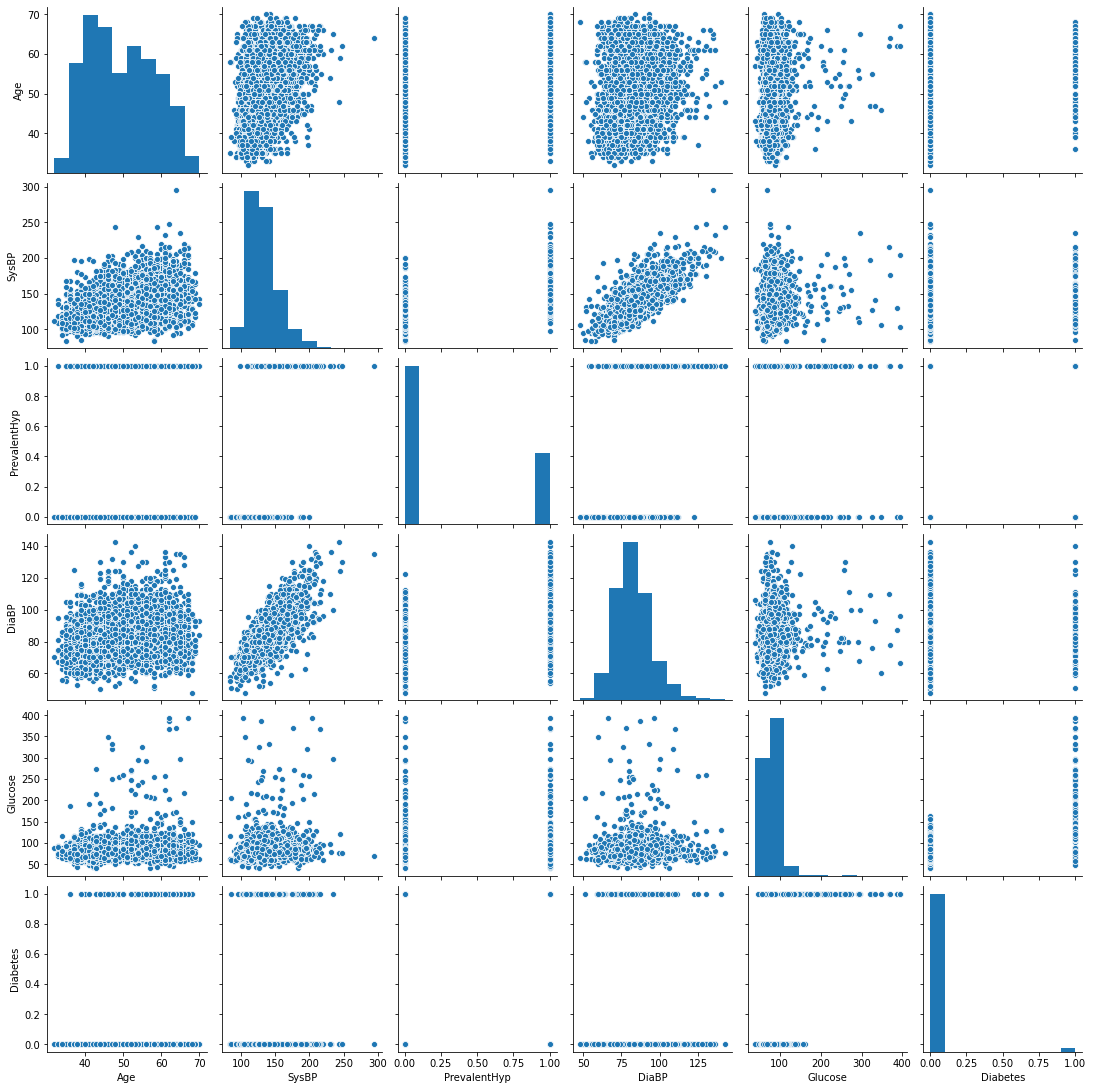

In [ ]:
sns.pairplot(df, vars=["Age", "SysBP","PrevalentHyp","DiaBP","Glucose","Diabetes"])

In [ ]:
#FEATURE ENGINEERING

In [ ]:
X = df_new.drop(columns='Target',axis=1)
y = df_new.Target

       Feature_Name       Score
1               Age  226.424830
10            SysBP  208.171803
7      PrevalentHyp  137.966856
11            DiaBP   91.358454
14          Glucose   62.315684
8          Diabetes   40.500615
0              Male   33.384171
5            BPMeds   32.138040
9        Total_Chol   28.411616
12              BMI   23.757085
6   PrevalentStroke   16.245574
4      Cigs_per_day   14.186825
2         Education   12.106260
13        Heartrate    2.222084
3     CurrentSmoker    1.604129


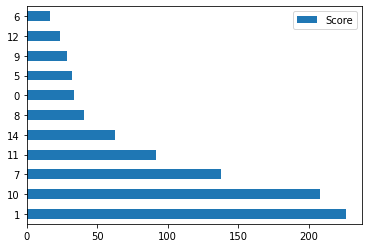

In [ ]:
#FEATURE SELECTION: Univariate method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# UNIVARIATE FEATURE SELECTION
best_features = SelectKBest(score_func=f_classif, k=11)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(11,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)
df_univ_feat.plot(kind='barh')
plt.show()

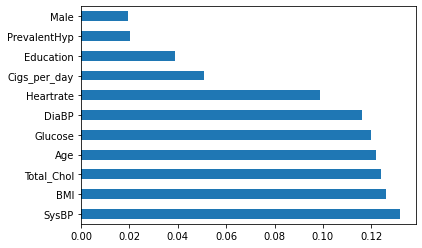

SysBP           0.131792
BMI             0.126065
Total_Chol      0.123988
Age             0.121829
Glucose         0.119719
DiaBP           0.116269
Heartrate       0.098901
Cigs_per_day    0.051045
Education       0.038722
PrevalentHyp    0.020075
Male            0.019589
dtype: float64


In [ ]:
#FEATURE SELECTION: Feature Importance Method
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier
# FEATURE IMPORTANCE FEATURE SELECTION
import numpy as np
np.random.seed(42)
# drop target columns

# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 11 most important features
df_imp_feat = feat_importances.nlargest(11)
# print(rf_model.feature_importances_)
# export selected features to .csv
df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
# plot 11 most important features
# feat_importances.nlargest(11).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

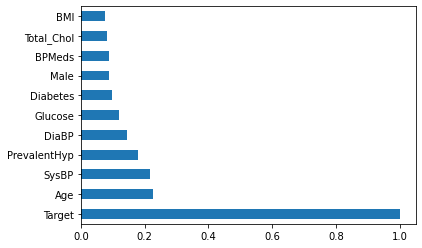

Target          1.000000
Age             0.225256
SysBP           0.216429
PrevalentHyp    0.177603
DiaBP           0.145299
Glucose         0.120406
Diabetes        0.097317
Male            0.088428
BPMeds          0.086774
Total_Chol      0.081624
BMI             0.074680
Name: Target, dtype: float64


In [ ]:
#FEATURE SELECTION: Feature Correlation Method
import numpy as np
import pandas as pd
# FEATURE IMPORTANCE CORRELATION
# determine 11 most correlated features
df_corr_health = df_new.corr()['Target'].sort_values(ascending=False).head(11)
top_corr_features = df_corr_health.index
# plot top 11 most correlated features to our target 
df_corr_health.plot(kind='barh')
plt.show()
# export selected features to .csv
df_corr_health.to_csv('feature_selection_CORRELATION.csv')
print(df_corr_health)

In [ ]:
#MODEL SELECTION

In [ ]:
data = pd.read_csv("feature_selection_UNIVARIATE.csv")

In [ ]:
data

,Feature_Name,Score
0,Age,226.424830
1,SysBP,208.171803
2,PrevalentHyp,137.966856
3,DiaBP,91.358454
4,Glucose,62.315684
5,Diabetes,40.500615
6,Male,33.384171
7,BPMeds,32.138040
8,Total_Chol,28.411616
9,BMI,23.757085


In [ ]:
data['Feature_Name']

0                 Age
1               SysBP
2        PrevalentHyp
3               DiaBP
4             Glucose
5            Diabetes
6                Male
7              BPMeds
8          Total_Chol
9                 BMI
10    PrevalentStroke
Name: Feature_Name, dtype: object

In [ ]:
df_new.columns

Index(['Male', 'Age', 'Education', 'CurrentSmoker', 'Cigs_per_day', 'BPMeds',
       'PrevalentStroke', 'PrevalentHyp', 'Diabetes', 'Total_Chol', 'SysBP',
       'DiaBP', 'BMI', 'Heartrate', 'Glucose', 'Target'],
      dtype='object')

In [ ]:
df_new1 = df_new.drop(['Cigs_per_day','Education','CurrentSmoker','Heartrate'],axis=1)

In [ ]:
df_new1.shape

(4238, 12)

In [ ]:
X_new1= df_new1.drop(columns='Target',axis=1)
y_new1= df_new1.Target

In [ ]:
# Split Data set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_new1,y_new1,test_size=0.30,random_state=123)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
! pip install lazypredict 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import time

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
classi=LazyClassifier(verbose=0,predictions=True)
# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=classi.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 30/30 [00:05<00:00,  5.55it/s]


In [ ]:
models_c

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.69,0.63,0.63,0.73,0.02
GaussianNB,0.82,0.57,0.57,0.79,0.02
ExtraTreeClassifier,0.76,0.57,0.57,0.76,0.02
QuadraticDiscriminantAnalysis,0.82,0.57,0.57,0.79,0.02
BernoulliNB,0.82,0.56,0.56,0.79,0.02
LabelPropagation,0.77,0.55,0.55,0.76,0.57
LabelSpreading,0.77,0.55,0.55,0.76,0.79
Perceptron,0.83,0.54,0.54,0.79,0.03
BaggingClassifier,0.83,0.54,0.54,0.79,0.17


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
predictions = log_model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      1063
         1.0       0.64      0.07      0.12       209

    accuracy                           0.84      1272
   macro avg       0.74      0.53      0.52      1272
weighted avg       0.81      0.84      0.78      1272

[[1055    8]
 [ 195   14]]


In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      1063
         1.0       0.64      0.04      0.08       209

    accuracy                           0.84      1272
   macro avg       0.74      0.52      0.50      1272
weighted avg       0.81      0.84      0.78      1272

[[1058    5]
 [ 200    9]]
